### Initiaing EDA

In this notebook, we will explore the dataset and collect some basic statistics.
Mainly, we focus on the number of images per label, per plant type, and per disease type.

We also check if all images have the same dimensions, and output basic histograms. We also output sample images to visualize the dataset.

Import necessary libraries 

In [ ]:
import os
import random
from collections import Counter

import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

Define paths

In [6]:
base_dir = os.path.join('..', 'data', 'raw', 'color')

print(f'Reading dataset at {base_dir}')

all_classes_sorted = sorted([d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))])

print(f'Found {len(all_classes_sorted)} classes')

Reading dataset at ../data/raw/color
Found 38 classes


Collect file paths and labels

In [ ]:
filepaths = []
labels = []
plant_types = []
disease_types = []

for class_name in all_classes_sorted:
    class_dir = os.path.join(base_dir, class_name)
    image_files = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]

    # Parse plant and disease classification name (e.g., "Apple___Apple_scab")
    try:
        plant, disease = class_name.split("___")
    except ValueError:
        print(f"Invalid class name: {class_name}")
        continue

    for image_file in image_files:
        filepath = os.path.join(class_dir, image_file)

        filepaths.append(filepath)
        labels.append(class_name)
        plant_types.append(plant)
        disease_types.append(disease)

# Convert to pandas DataFrame
df = pd.DataFrame({
    "filepath": filepaths,
    "label": labels,
    "plant_type": plant_types,
    "disease_type": disease_types
})

print(f"Total number of images: {len(df)}")
print(f"Total number of unique labels: {len(df["label"].unique())}")
print(f"Total number of unique plant types: {len(df["plant_type"].unique())}")
print(f"Total number of unique disease types: {len(df["disease_type"].unique())}")

Total number of images: 54305
Total number of unique labels: 38
Total number of unique plant types: 14
Total number of unique disease types: 21
First 5 rows of the DataFrame:
                                            filepath               label  \
0  ../data/raw/color/Apple___Apple_scab/00075aa8-...  Apple___Apple_scab   
1  ../data/raw/color/Apple___Apple_scab/01a66316-...  Apple___Apple_scab   
2  ../data/raw/color/Apple___Apple_scab/01f3deaa-...  Apple___Apple_scab   
3  ../data/raw/color/Apple___Apple_scab/0208f4eb-...  Apple___Apple_scab   
4  ../data/raw/color/Apple___Apple_scab/023123cb-...  Apple___Apple_scab   

  plant_type disease_type  
0      Apple   Apple_scab  
1      Apple   Apple_scab  
2      Apple   Apple_scab  
3      Apple   Apple_scab  
4      Apple   Apple_scab  


Checking if all images have the same dimensionality

In [ ]:
dimensions = Counter()
checked_classes = set()

for file_path in df['filepath']:
    try:
        with Image.open(file_path) as img:
            dimensions[img.size] += 1
    except:
        print(f"Could not open {file_path}")

print(f"Image dimensions found (width, heigh)")
if dimensions:
    for dim, count in dimensions.items():
        print(f"{dim}: {count}")
else:
    print("No images found")

Checking dimensions of 100 random images
Image dimensions found (width, heigh)
(256, 256): 54305


Plotting the class and dataset distributions

Saved plot: ../outputs/plots/count_per_plant_disease.png
Saved plot: ../outputs/plots/count_per_plant.png
Saved plot: ../outputs/plots/count_per_disease.png


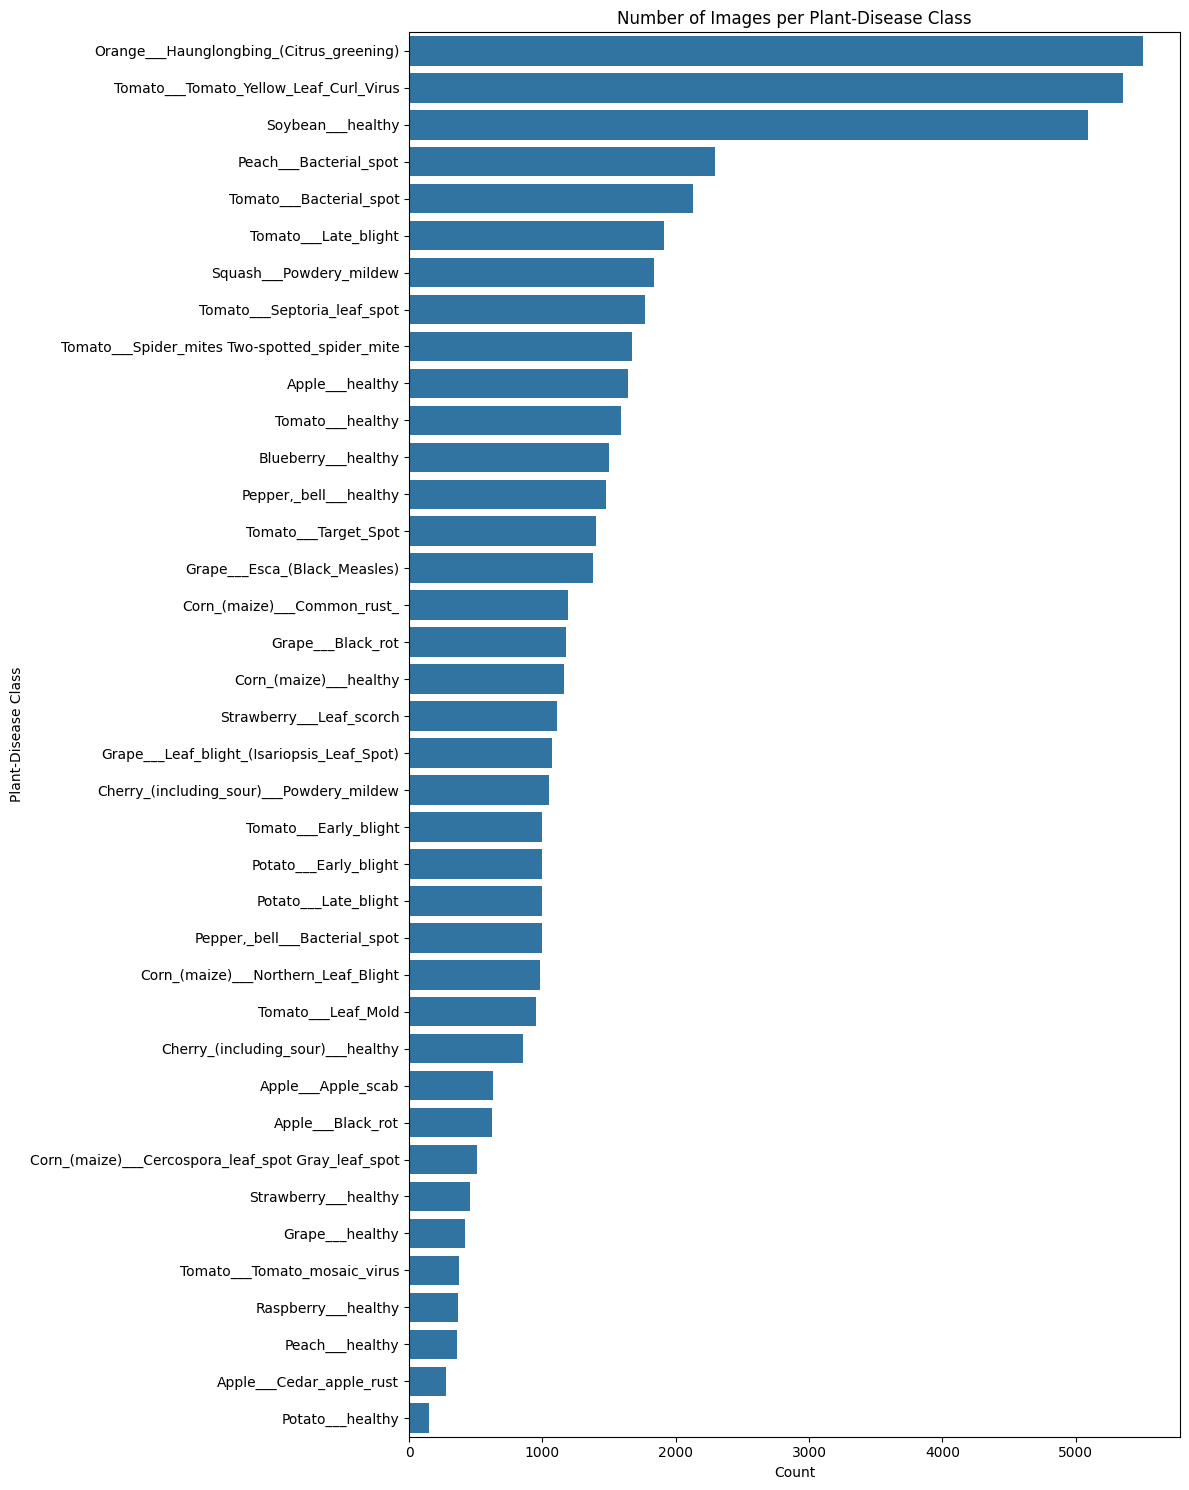

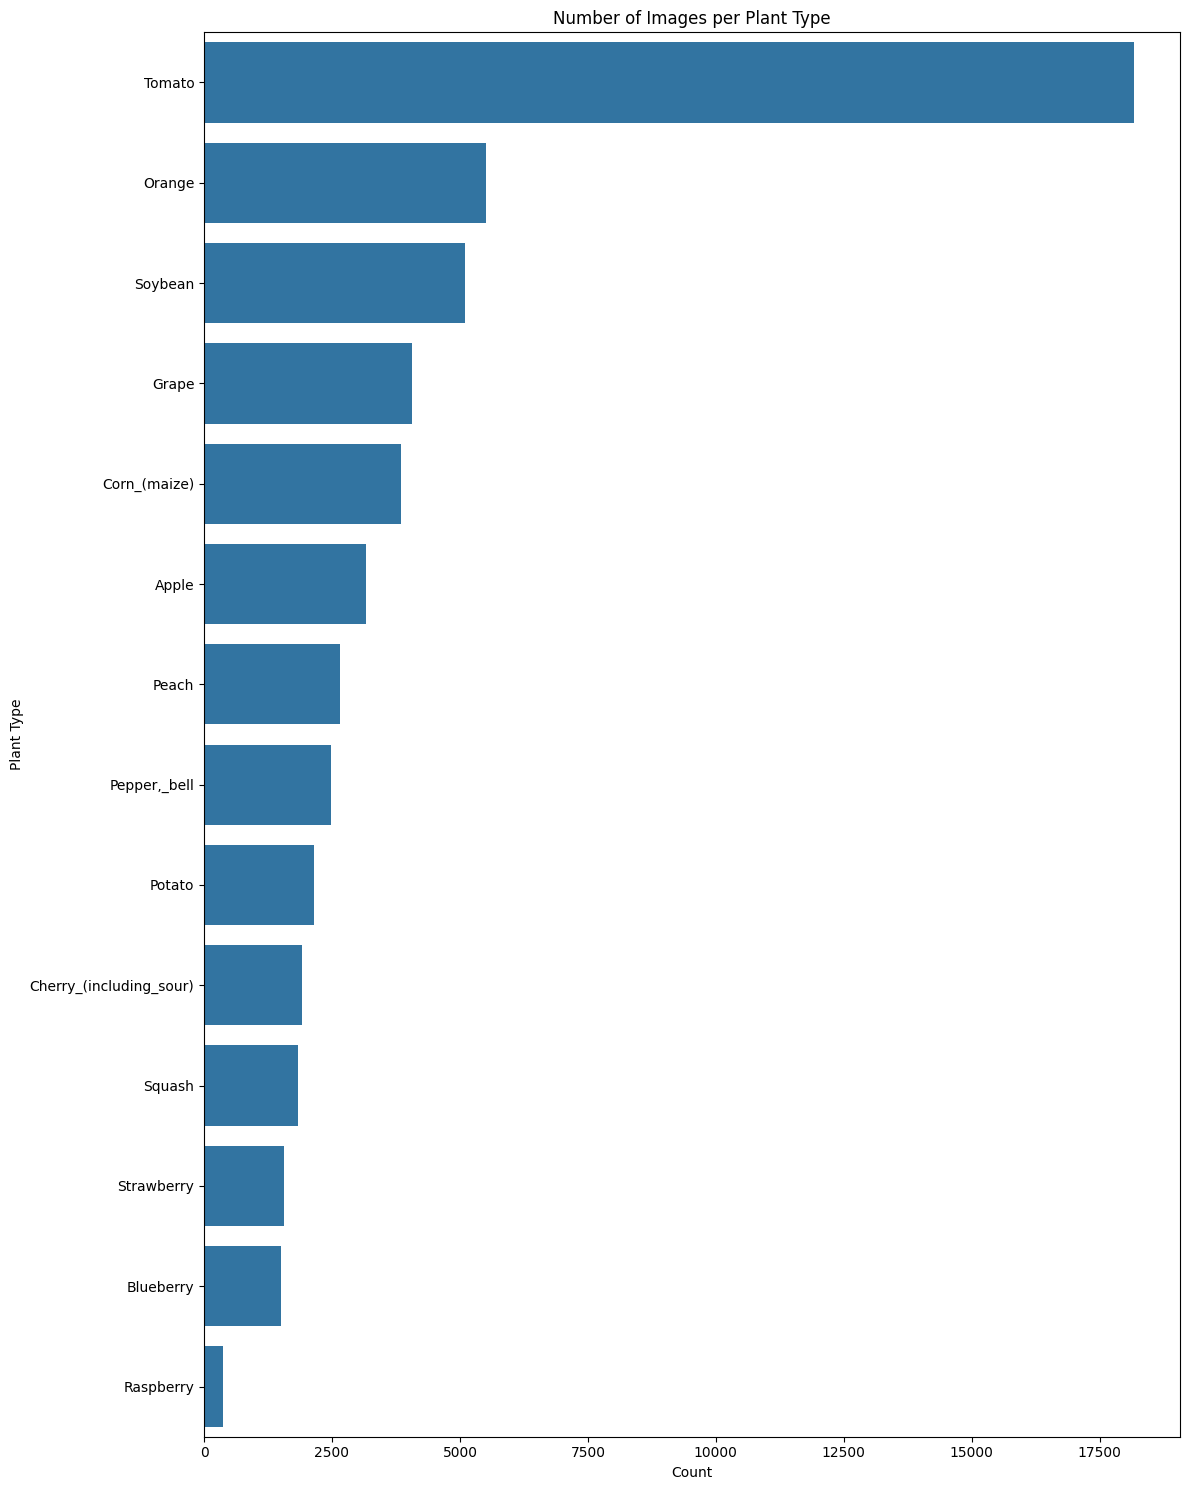

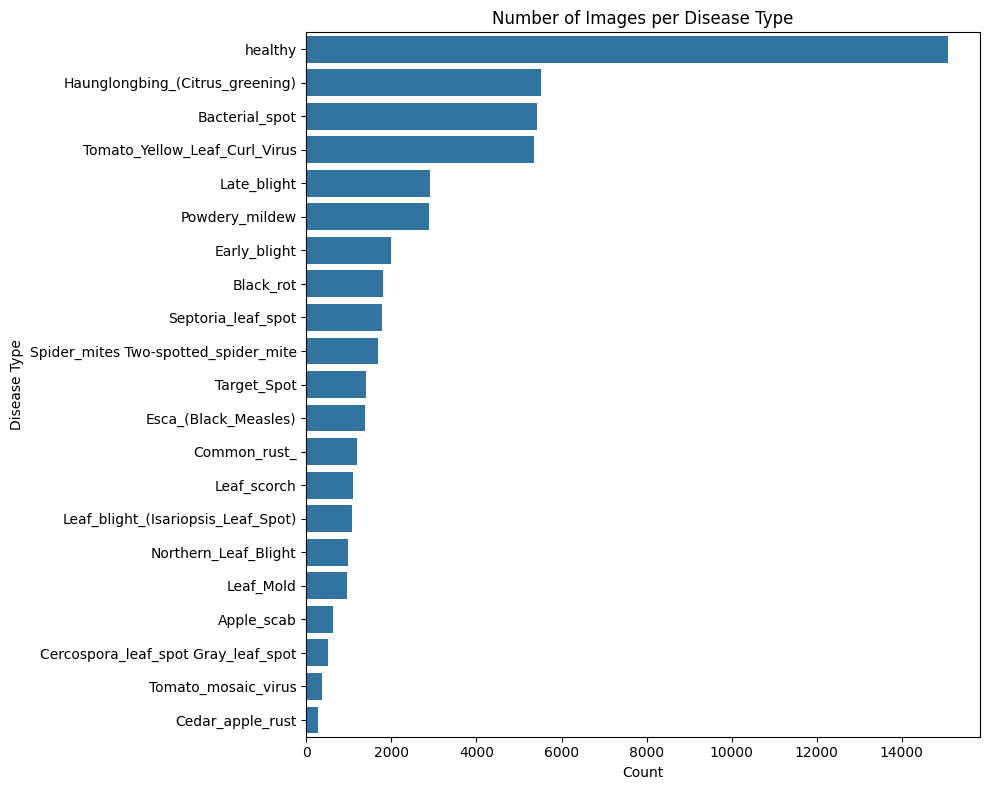

In [ ]:
output_plot_dir = os.path.join('..', 'outputs', 'plots')
os.makedirs(output_plot_dir, exist_ok=True)

# Plot the number of observations per Plant_Disease (Label)
plt.figure(figsize=(12, 15))
sns.countplot(y='label', data=df, order=df['label'].value_counts().index)
plt.title('Number of Images per Plant-Disease Class')
plt.xlabel('Count')
plt.ylabel('Plant-Disease Class')
plt.tight_layout()
plt.savefig(os.path.join(output_plot_dir, 'count_per_plant_disease.png'))
print(f"Saved plot: {os.path.join(output_plot_dir, 'count_per_plant_disease.png')}")
# plt.show()


# Plot the number of observations per Plant Type
plt.figure(figsize=(12, 15))
sns.countplot(y='plant_type', data=df, order=df['plant_type'].value_counts().index)
plt.title("Number of Images per Plant Type")
plt.xlabel("Count")
plt.ylabel("Plant Type")
plt.tight_layout()
plt.savefig(os.path.join(output_plot_dir, 'count_per_plant.png'))
print(f"Saved plot: {os.path.join(output_plot_dir, 'count_per_plant.png')}")
# plt.show()

# Plot the number of observations per Disease Type
plt.figure(figsize=(10, 8))
sns.countplot(y='disease_type', data=df, order=df['disease_type'].value_counts().index)
plt.title("Number of Images per Disease Type")
plt.xlabel("Count")
plt.ylabel("Disease Type")
plt.tight_layout()
plt.savefig(os.path.join(output_plot_dir, 'count_per_disease.png'))
print(f"Saved plot: {os.path.join(output_plot_dir, 'count_per_disease.png')}")
# plt.show()


View sample images

Saved plot: ../outputs/plots/sample_images.png


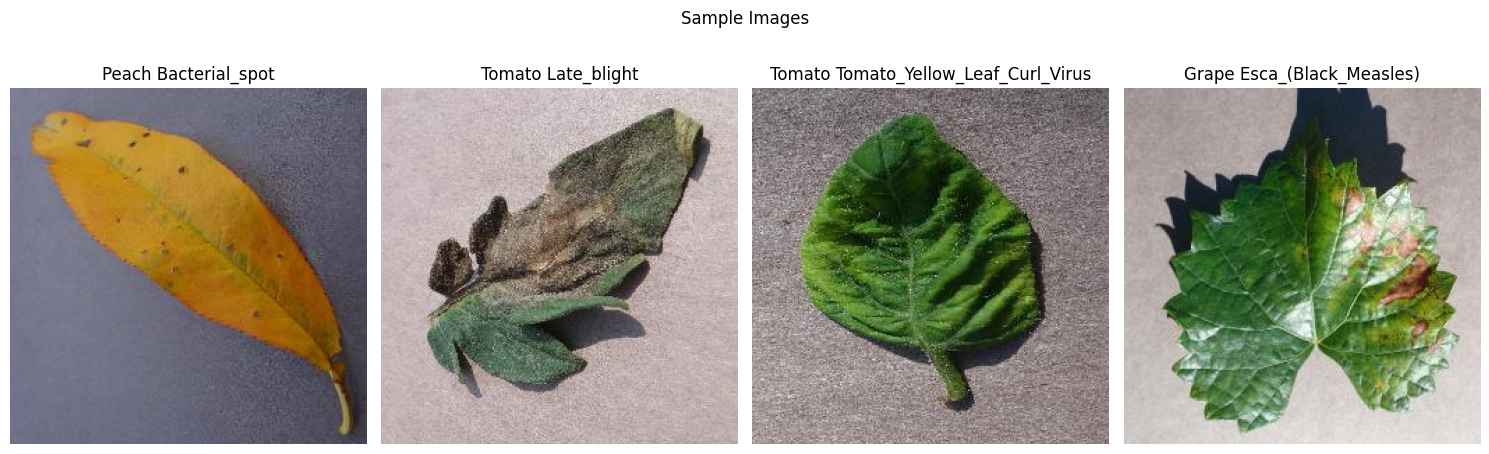

In [28]:
num_samples_visualize = 4
sample_df = df.sample(num_samples_visualize, random_state=1)

plt.figure(figsize=(15, 5))
for i, (idx, row) in enumerate(sample_df.iterrows()):
    plt.subplot(1, num_samples_visualize, i + 1)

    try:
        img = Image.open(row['filepath'])
        plt.imshow(img)
        plt.title(f"{row['plant_type']} {row['disease_type']}")
        plt.axis('off')
    except:
        print(f"Could not open {row['filepath']}")
        plt.title('Error loading')
        plt.axis('off')

plt.suptitle('Sample Images')
plt.tight_layout() 
plt.savefig(os.path.join(output_plot_dir, 'sample_images.png'))
print(f"Saved plot: {os.path.join(output_plot_dir, 'sample_images.png')}")
# plt.show()